In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os

In [3]:
#load dataset
DATA_PATH = 'car data.csv'
df = pd.read_csv(DATA_PATH)

In [4]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [5]:
#Choose target column
TARGET = "Selling_Price"
if TARGET not in df.columns:
    # fallback: last numeric column
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    TARGET = numeric_cols[-1]
print("\nTarget chosen:", TARGET)


Target chosen: Selling_Price


In [6]:
# Separate features and target
X = df.drop(columns=[TARGET])
y = df[TARGET]


In [8]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (240, 8)
Test shape: (61, 8)


In [ ]:
#define numeric and categorical column
numeric_features = ["Year", "Present_Price", "Driven_kms"]
categorical_features = ["Car_Name", "Fuel_Type", "Selling_type", "Transmission"]


In [10]:
# numeric preprocessing steps
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [11]:
# categorical preprocessing steps
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [12]:
#Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numeric_features),
    ("cat", cat_pipeline, categorical_features)
])

In [13]:
#Build the COMPLETE Model Pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [14]:
#random forest
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [15]:
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
rf_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))

print("R2:", r2_score(y_test, y_pred))


MAE: 0.8141692952181226
R2: 0.9532848895089076


In [19]:
lr_pred = model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, lr_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))


Linear Regression MAE: 0.8141692952181226
Random Forest MAE: 0.6141409836065571


In [20]:
best_model = rf_model


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

rf_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)   # returns MSE
rmse = (mse ** 0.5)                         # sqrt
print("RF R2:", r2_score(y_test, rf_pred))
print("RF RMSE:", rmse)


RF R2: 0.9490590117532938
RF RMSE: 1.1347473675654505


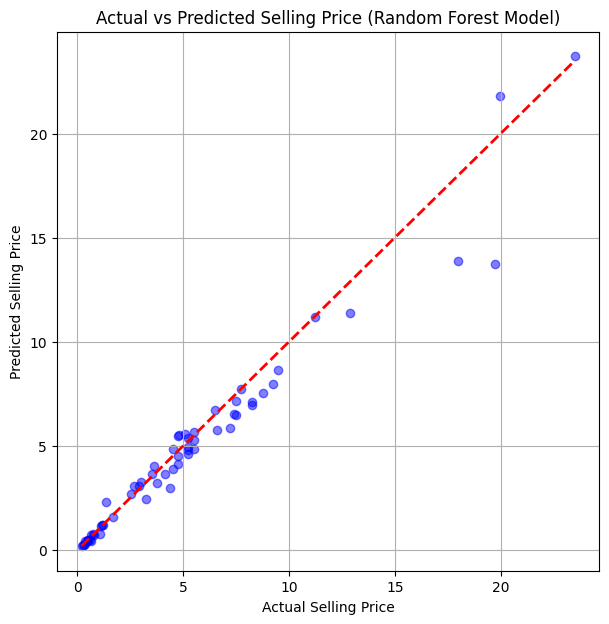

In [25]:
#Actual vs Predicted Graph
f_pred = rf_model.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, rf_pred, alpha=0.5, color='blue')

# Line of perfect prediction
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', linewidth=2)

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Random Forest Model)")
plt.grid(True)
plt.show()

# Conclusion
 In this project, two machine learning models—Linear Regression and Random Forest Regressor—were trained to predict the selling price of used cars. Both models were evaluated using metrics such as MAE, RMSE, and R² score.

Random Forest achieved a lower MAE (0.6141) compared to Linear Regression (0.8141), indicating more accurate price predictions. The Actual vs Predicted graph also shows that Random Forest predictions lie closer to the ideal line. Although Linear Regression had a slightly higher R² score, Random Forest provided better real-world predictive performance.

Therefore, Random Forest Regressor was selected as the final model for car price prediction due to its superior accuracy and stability.